In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 39.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 68.7 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=51761144f84bb11c09cab267bebf7342eb822913a1b5c21e141975196f24dd23
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.9 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=c7b3605a7947e6ecb52387a4852c591c80133af7d3f2c6dd3fd227c18edb7842
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=d5ec1c5e9a24fd095714b08a7dda1d10df95056a8810

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 81.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.1 MB/s eta 0:00:00


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup


In [51]:
book = "Wizard_ The Life and Times of Nikola Tesla _ Biography of a Genius ( PDFDrive )"
startdate = 1700
enddate = 2023
wikilink = "https://en.wikipedia.org/wiki/Nikola_Tesla"
titlename = "Nikola_Tesla"

In [52]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [53]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [54]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter_'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

48
1/chapter_1
1/chapter_2
1/chapter_3
1/chapter_4
1/chapter_5
1/chapter_6
1/chapter_7
1/chapter_8
1/chapter_9
1/chapter_10
1/chapter_11
1/chapter_12
1/chapter_13
1/chapter_14
1/chapter_15
1/chapter_16
1/chapter_17
1/chapter_18
1/chapter_19
1/chapter_20
1/chapter_21
1/chapter_22
1/chapter_23
1/chapter_24
1/chapter_25
1/chapter_26
1/chapter_27
1/chapter_28
1/chapter_29
1/chapter_30
1/chapter_31
1/chapter_32
1/chapter_33
1/chapter_34
1/chapter_35
1/chapter_36
1/chapter_37
1/chapter_38
1/chapter_39
1/chapter_40
1/chapter_41
1/chapter_42
1/chapter_43
1/chapter_44
1/chapter_45
1/chapter_46
1/chapter_47
1/chapter_48


In [55]:
mp_bert

{'1/chapter_1': [('croatsand serbs', 0.4766),
  ('nikola tesla1it', 0.4496),
  ('serbs', 0.4489),
  ('croats', 0.4285),
  ('croatia inthe', 0.4226)],
 '1/chapter_2': [('nikola tesla', 0.5369),
  ('father tesla', 0.5309),
  ('teslawrote', 0.5212),
  ('tesla name', 0.5072),
  ('bookthat tesla', 0.4916)],
 '1/chapter_3': [('courses tesla', 0.5282),
  ('professor galileo ferraris ofturin', 0.4984),
  ('physics professor', 0.4575),
  ('philosopher ernst mach', 0.4536),
  ('physicist', 0.4455)],
 '1/chapter_4': [('wizard ofmenlo park', 0.4117),
  ('edisonand batchelor', 0.3717),
  ('edison', 0.3698),
  ('batchelor incorrectlyas edison', 0.3694),
  ('nikola tesla', 0.359)],
 '1/chapter_5': [('edison', 0.5795),
  ('tesla patents', 0.5768),
  ('nikola tesla', 0.5763),
  ('thomas edison', 0.5727),
  ('edison machine worksin', 0.5483)],
 '1/chapter_6': [('nikola tesla on george', 0.546),
  ('westinghouse campagainst tesla', 0.5139),
  ('nikola tesla', 0.4641),
  ('george westinghouse', 0.4328),
 

In [56]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [57]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
14
15
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
14
15
15
15
15
15
15
15
15
15
15
15


In [58]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'thechamber of commerce', 'convincing demonstrations', 'achieving interplanetarycommunication', 'telephone exchange', 'largephotographs of dozens', 'ofwhich tesla', 'hoteldescribed the managers’', 'etiology of avariety', 'astoria', 'mathematical calculations', 'dormdoor to check', 'question tesla', 'beam weapons', 'wirelesscommunication poppycock', 'philanthropicinvestment worth', 'engine and boiler', 'royalty payments', 'silent as onlyyou', 'tuned circuits', 'engineering professor', 'capital punishment', 'tomorrow evening', 'papers in California', 'Jewsor the Crucifixion', 'turbines', 'barbarians and torturers', 'study engineering', 'transmitters', 'removing the commutatorfrom', 'edisonand batchelor', 'transmitting and receivingconductors', 'joining the transmitterwith', 'discounts for bulkpurchases', 'yourdisappointed countenances', 'cityto the dizzying', 'officewith his fantastic', 'electrical exposition', 'george westinghouse', 'professor galileo ferraris ofturin', 'morgan', 'magn

In [59]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) <= enddate and int(date) >= startdate:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter_{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Nikola_Tesla1It_1843': ['1/chapter_1'], 'Incessant_Battlesagainst_1843': ['1/chapter_1'], 'Serbs_1843': ['1/chapter_1'], 'Characteristic_Featuresof_1843': ['1/chapter_1'], 'Croats_1843': ['1/chapter_1'], 'Streams_And_Magnificent_1843': ['1/chapter_1'], 'Jewsor_The_Crucifixion_1843': ['1/chapter_1'], 'Crackling_Summer_Storm_1843': ['1/chapter_1'], 'Croatia_Inthe_1843': ['1/chapter_1'], 'Battlesagainst_Barbarous_1843': ['1/chapter_1'], 'Philosophyhelped_Dismantle_1843': ['1/chapter_1'], 'Croatsand_Serbs_1843': ['1/chapter_1'], 'Influences_Monasticenvironment_1843': ['1/chapter_1'], 'Servians.From_The_Height_1843': ['1/chapter_1'], 'Caves_And_Streams_1843': ['1/chapter_1'], 'Psychoneurological_Disturbances_1856': ['1/chapter_2'], 'Day_1856': ['1/chapter_2'], 'Theintensity_Of_Feeling_1856': ['1/chapter_2'], 'Intelligence_Andunderstanding_1856': ['1/chapter_2'], 'Tesla_Name_1856': ['1/chapter_2'], 'Tesla_1892': ['1/chapter_10'], 'Tesla_1894': ['1/chapter_13', '

In [60]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [61]:
key_yr_chap_mp

defaultdict(list,
            {'Nikola_Tesla1It_1843': ['1/chapter_1'],
             'Incessant_Battlesagainst_1843': ['1/chapter_1'],
             'Serbs_1843': ['1/chapter_1'],
             'Characteristic_Featuresof_1843': ['1/chapter_1'],
             'Croats_1843': ['1/chapter_1'],
             'Streams_And_Magnificent_1843': ['1/chapter_1'],
             'Jewsor_The_Crucifixion_1843': ['1/chapter_1'],
             'Crackling_Summer_Storm_1843': ['1/chapter_1'],
             'Croatia_Inthe_1843': ['1/chapter_1'],
             'Battlesagainst_Barbarous_1843': ['1/chapter_1'],
             'Philosophyhelped_Dismantle_1843': ['1/chapter_1'],
             'Croatsand_Serbs_1843': ['1/chapter_1'],
             'Influences_Monasticenvironment_1843': ['1/chapter_1'],
             'Servians.From_The_Height_1843': ['1/chapter_1'],
             'Caves_And_Streams_1843': ['1/chapter_1'],
             'Psychoneurological_Disturbances_1856': ['1/chapter_2'],
             'Day_1856': ['1/chapter

In [62]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Nikola_Tesla1It_1843
Incessant_Battlesagainst_1843
Serbs_1843
Characteristic_Featuresof_1843
Croats_1843
Streams_And_Magnificent_1843
Jewsor_The_Crucifixion_1843
Crackling_Summer_Storm_1843
Croatia_Inthe_1843
Battlesagainst_Barbarous_1843
Philosophyhelped_Dismantle_1843
Croatsand_Serbs_1843
Influences_Monasticenvironment_1843
Servians.From_The_Height_1843
Caves_And_Streams_1843
Psychoneurological_Disturbances_1856
Day_1856
Theintensity_Of_Feeling_1856
Intelligence_Andunderstanding_1856
Tesla_Name_1856
Tesla_1892
Tesla_1894
Tesla_1896
Tesla_1899
Tesla_1901
Tesla_1907
Tesla_1911
Tesla_1918
Tesla_1934
Bookthat_Tesla_1856
Exercises_In_Developing_1856
Teslawrote_1856
Teslawrote_1896
Nikola_Tesla_1856
Nikola_Tesla_1884
Nikola_Tesla_1886
Nikola_Tesla_1888
Nikola_Tesla_1893
Nikola_Tesla_1894
Nikola_Tesla_1895
Nikola_Tesla_1896
Nikola_Tesla_1897
Nikola_Tesla_1900
Nikola_Tesla_1902
Nikola_Tesla_1907
Nikola_Tesla_1911
Nikola_Tesla_1912
Nikola_Tesla_1917
Nikola_Tesla_1918
Nikola_Tesla_1931
Nikola_

In [63]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [64]:
url = wikilink
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Early_years', 'Working_at_Budapest_Telephone_Exchange', 'Working_at_Edison', 'Moving_to_the_United_States', 'Tesla_Electric_Light_&_Manufacturing', 'AC_and_the_induction_motor', 'Market_turmoil', 'New_York_laboratories', 'Tesla_coil', 'Citizenship', 'Wireless_lighting', 'Polyphase_system_and_the_Columbian_Exposition', 'Steam-powered_oscillating_generator', 'Consulting_on_Niagara', 'The_Nikola_Tesla_Company', 'Lab_fire', 'X-ray_experimentation', 'Radio_remote_control', 'Wireless_power', 'Colorado_Springs', 'Wardenclyffe', 'Later_years', 'Bladeless_turbine', 'Wireless_lawsuits', 'Nobel_Prize_rumors', 'Other_awards,_patents_and_ideas', 'Living_circumstances', 'Birthday_press_conferences', 'Death', 'Estate', 'Patents', 'Personal_life_and_character', 'Appearance', 'Eidetic_memory', 'Relationships', 'Sleep_habits', 'Work_and_dining_habits', 'Views_and_beliefs', 'On_experimental_and_theoretical_physics', 'On_society', 'On_religion', 'Literary_works', 'Legacy_and_honors', 'Things_named_after

In [65]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' and val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [66]:
mp_sim_score

{'Early_years->Nikola_Tesla1It_1843': tensor(0.7344, device='cuda:0'),
 'Early_years->Serbs_1843': tensor(0.3992, device='cuda:0'),
 'Early_years->Croats_1843': tensor(0.4181, device='cuda:0'),
 'Early_years->Croatia_Inthe_1843': tensor(0.4836, device='cuda:0'),
 'Early_years->Croatsand_Serbs_1843': tensor(0.4101, device='cuda:0'),
 'Early_years->Influences_Monasticenvironment_1843': tensor(0.4643, device='cuda:0'),
 'Early_years->Servians.From_The_Height_1843': tensor(0.0276, device='cuda:0'),
 'Early_years->Psychoneurological_Disturbances_1856': tensor(0.2236, device='cuda:0'),
 'Early_years->Theintensity_Of_Feeling_1856': tensor(0.2304, device='cuda:0'),
 'Early_years->Tesla_Name_1856': tensor(0.7427, device='cuda:0'),
 'Early_years->Tesla_1892': tensor(0.4707, device='cuda:0'),
 'Early_years->Tesla_1894': tensor(0.5076, device='cuda:0'),
 'Early_years->Tesla_1896': tensor(0.4665, device='cuda:0'),
 'Early_years->Tesla_1899': tensor(0.5038, device='cuda:0'),
 'Early_years->Tesla_190

In [67]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [68]:
import json
with open(f"mp_sim_score_{book}.json") as outfile:
    mp_sim_score = json.load(outfile)

In [69]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    # plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [70]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<0"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


# display_bar_plot(mp_sim_score_bar_range,rf"similarity distribution for {book}","similarity","count")

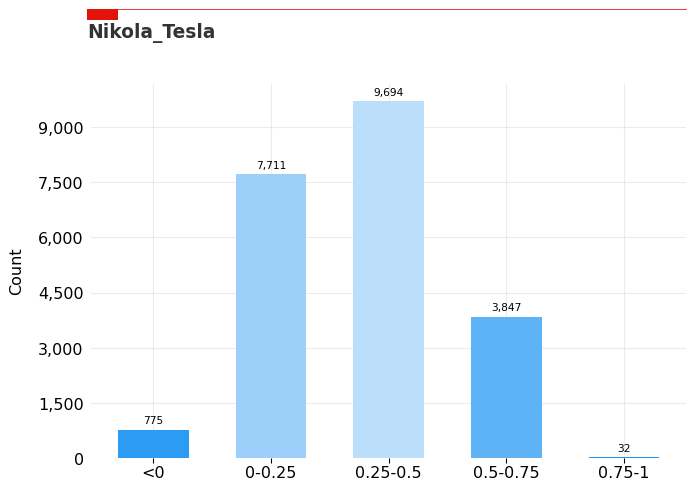

In [71]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Create the figure and axes objects, specify the size and the dots per inches
# delay_by_month['Month'], delay_by_month['ArrDelay'] ->  
# list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values())

fig, ax = plt.subplots(figsize=(8,6), dpi = 96)

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()),width=0.6)
# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = list(mp_sim_score_bar_range.keys())
ax.set_xticks(list(mp_sim_score_bar_range.keys()), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in list(mp_sim_score_bar_range.values())], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s=titlename, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=.90, s="between Wikipedia section content and Keyword focused paragraph", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
# ax.text(x=0.1, y=0.12, s="Mahatma Gandhi", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(min(list(mp_sim_score_bar_range.values())), max(list(mp_sim_score_bar_range.values()))) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()), color=cmap(norm(list(mp_sim_score_bar_range.values()))), width=0.6, zorder=2)
fig.savefig(f"similarity_distribution_{book}.png")

In [72]:
from statistics import median
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) <= enddate and int(date) >= startdate:                    
                #print date
                year_list.append(int(date))
    except:
        pass
    if year_list:
        # res = max(set(year_list), key=year_list.count)
        res = median(year_list)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
print(wiki_section_date)

{'Early_years': 1874, 'Working_at_Budapest_Telephone_Exchange': 1881, 'Working_at_Edison': 1882, 'Moving_to_the_United_States': 1884, 'Tesla_Electric_Light_&_Manufacturing': 1886, 'AC_and_the_induction_motor': 1887, 'Market_turmoil': 1890, 'New_York_laboratories': 1892, 'Tesla_coil': 1888, 'Citizenship': 1891, 'Wireless_lighting': 1892, 'Polyphase_system_and_the_Columbian_Exposition': 1893, 'Steam-powered_oscillating_generator': -1, 'Consulting_on_Niagara': 1893, 'The_Nikola_Tesla_Company': 1892, 'Lab_fire': 1894, 'X-ray_experimentation': 1895, 'Radio_remote_control': 1898, 'Wireless_power': 1890, 'Colorado_Springs': 1899, 'Wardenclyffe': 1902, 'Later_years': 1914, 'Bladeless_turbine': 1911, 'Wireless_lawsuits': 1909, 'Nobel_Prize_rumors': 1915, 'Other_awards,_patents_and_ideas': 1922, 'Living_circumstances': 1932, 'Birthday_press_conferences': 1933, 'Death': 1943, 'Estate': 1954, 'Patents': -1, 'Personal_life_and_character': -1, 'Appearance': 1907, 'Eidetic_memory': -1, 'Relationships

In [73]:
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = enddate-startdate
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
        rank = 0.5*date_score + 0.5*sim_score
        mixed_sim_score[key] = rank

## Keyword Filteration 1

In [74]:
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))

final_kw = set()

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    final_kw.add(ele[0])
# print(final_kw)
print(len(final_kw))

# initialization
kw_max_score = {}
for k in final_kw:
  kw_max_score[k] = 0

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    kw_max_score[ele[0]] = max(kw_max_score[ele[0]], ele[1])
# print(kw_max_score)


427


In [75]:
for k,v in section_wise_keyword_filtered.items():
  print(f"{k}   ->  {len(v)}")

Early_years   ->  245
Working_at_Budapest_Telephone_Exchange   ->  290
Working_at_Edison   ->  316
Moving_to_the_United_States   ->  328
Tesla_Electric_Light_&_Manufacturing   ->  317
AC_and_the_induction_motor   ->  308
Market_turmoil   ->  274
New_York_laboratories   ->  275
Tesla_coil   ->  322
Citizenship   ->  273
Wireless_lighting   ->  335
Polyphase_system_and_the_Columbian_Exposition   ->  275
Steam-powered_oscillating_generator   ->  304
Consulting_on_Niagara   ->  268
The_Nikola_Tesla_Company   ->  313
Lab_fire   ->  289
X-ray_experimentation   ->  304
Radio_remote_control   ->  327
Wireless_power   ->  321
Colorado_Springs   ->  335
Wardenclyffe   ->  313
Later_years   ->  266
Bladeless_turbine   ->  302
Wireless_lawsuits   ->  310
Nobel_Prize_rumors   ->  291
Other_awards,_patents_and_ideas   ->  321
Living_circumstances   ->  83
Birthday_press_conferences   ->  354
Death   ->  239
Estate   ->  254
Patents   ->  254
Appearance   ->  254
Eidetic_memory   ->  277
Relationship

In [76]:
mp_final_kw = collections.defaultdict(list)
for k,v in section_wise_keyword_filtered.items():
  mp = {}
  for ele in v:
    mp[ele[0]] = ele[1]
  for ele in v:
    if mp[ele[0]] == kw_max_score[ele[0]]:
      mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in mp_final_kw.items():
#   mp1[k] = len(v)
#   # print(f"{k}   ->  {len(v)}")

# print(mp1)

In [77]:
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in mp_final_kw.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")
mp1 = {}
for k,v in section_wise_keyword_sort_only.items():
  mp1[k] = len(v)
  # print(f"{k}   ->  {len(v)}")

print(mp1)

Early_years  ->   ['Nikola_Tesla_1856', 'Teslawrote_1856', 'Father_Tesla_1856', 'Tesla_Name_1856', 'Bookthat_Tesla_1856']
Working_at_Budapest_Telephone_Exchange  ->   ['Phone_Interview_1900']
Moving_to_the_United_States  ->   ['Edisonand_Batchelor_1884', 'Batchelor_Incorrectlyas_Edison_1884', 'Nikola_Tesla_1884', 'Boiler_And_Placedthe_1884', 'Engine_And_Boiler_1884']
Tesla_Electric_Light_&_Manufacturing  ->   ['Nikola_Tesla_1886', 'Tesla_Patents_1886', 'Thomas_Edison_1886', 'Edison_Machine_Worksin_1886', 'Alternating_Current_1886']
Market_turmoil  ->   ['Owned_The_Patents.Although_1890', 'Patents.Although_The_Thomson-Houston_1890', 'Edison_Company_1890', '7Bogus_Inventors_1890', 'Discoveries_1890']
Tesla_coil  ->   ['Westinghouse_Campagainst_Tesla_1888', 'Nikola_Tesla_On_George_1888', 'Induction_Motor_1888', 'Electricity_1888', 'George_Westinghouse_1888']
Citizenship  ->   ['Writings_Ofnikola_Tesla_1891', 'Tesla_Patents_1891', 'Edisongeneral_Electric_1891', 'Edison_Electric_1891', 'Ele

In [78]:
# top_mp_final_kw = collections.defaultdict(list)
# for k,v in mp_final_kw.items():
#   for ele in v:
#     if ele[1]>0.50:
#       print(ele)
#       top_mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in top_mp_final_kw.items():
#   mp1[k] = len(v)

# print(mp1)

In [79]:
# for k,v in section_wise_keyword_filtered.items():
#   mp = {}
#   for ele in v:
#     mp[ele[0]] = ele[1]

#   for ele in v:
#     if mp[ele[0]]  != kw_max_score[ele[0]]:
#       section_wise_keyword_filtered[k].remove(ele)

# for k,v in section_wise_keyword_filtered.items():
#   print(f"{k}   ->  {len(v)}")

In [80]:
with open(rf"filtered_kw_{book}.json", "w") as outfile:
    json.dump(mp_final_kw, outfile)

In [81]:
def kw_2_nrml(s1):
  temp = s1[:s1.rindex('_')]
  a = temp.split('_')
  # for i,v in enumerate(a):
  #     a[i] = v.lower()
      
  val = " ".join(a)
  return val
  
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

temp = []
multitimekws = []
for k in final_kw:
  temp.append(kw_2_nrml(k))

mp = collections.Counter(temp)
for k,v in mp.items():
  if v>1:
    multitimekws.append(k)

print(multitimekws)
print(len(multitimekws))

section_to_num = {}  # this dict will store num of keywords which are present in keywords as a simple text
for k,v in section_wise_keyword_sort.items():
  cnt = set()
  for ele in v:
    temp = kw_2_nrml(ele[0])
    if find_freq(temp,id_to_paragraph[k])>0: #and temp not in multitimekws:
      cnt.add(temp)
  section_to_num[k] = cnt

mp2 = {}
for k,v in section_to_num.items():
  mp2[k] = len(v)

print(mp2)

['Tesla', 'Incandescent Lamp', 'Inventor', 'Thomas Edison', 'Electrical Energy', 'Telegraphy', 'Alternating Current', 'Electrical Power', 'Wireless Enterprise', 'Ray', 'Teslawould', 'Tom Edison', 'Wireless Transmitters', 'Nikola Tesla1Tesla', 'Nikola Tesla', 'Wireless Communication', 'Wireless Transmission', 'Tesla Coils', 'Fluorescent Lights', 'Teslawrote', 'Bladeless Turbines', 'Bladeless Turbine', 'Electricity', 'Magnifying Transmitter', 'Inventions', 'Invention', 'Particle Beam', 'Tesla Patents', 'Wireless Telegraphy']
29
{'Early_years': 1, 'Working_at_Budapest_Telephone_Exchange': 0, 'Moving_to_the_United_States': 0, 'Tesla_Electric_Light_&_Manufacturing': 1, 'Market_turmoil': 0, 'Tesla_coil': 1, 'Citizenship': 0, 'Wireless_lighting': 1, 'Polyphase_system_and_the_Columbian_Exposition': 0, 'Consulting_on_Niagara': 0, 'The_Nikola_Tesla_Company': 0, 'Lab_fire': 1, 'X-ray_experimentation': 0, 'Radio_remote_control': 0, 'Wireless_power': 0, 'Colorado_Springs': 0, 'Wardenclyffe': 0, 'La

In [82]:
print(sum(list(mp2.values())))

12


In [83]:
def FetchURLSBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())
    linkToScrape = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
#             my_lst.append(tag.get_text())
            allLinks = tag.find_all('a')
            
            for link in allLinks:
                if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
                    linkToScrape.append(link['href'].replace('/wiki/',""))
        if tag == endElem:
            inBetween = False
            break
    return set(linkToScrape)

mp_urls_section_mp  = {}
for i in range(len(desired_ids)-1):
    mp_urls_section_mp[desired_ids[i]] = FetchURLSBetweenIds(desired_ids[i],desired_ids[i+1])

# print(mp_urls_section_mp)

sec_2_common_link = {}
for k,v in section_wise_keyword_sort.items():
  couldbelinks = set()
  for ele in v:
    s1 = ele[0]
    couldbelinks.add(s1[:s1.rindex('_')])
  sec_2_common_link[k] = mp_urls_section_mp[k].intersection(couldbelinks)

print(sec_2_common_link)
# print(sum(list(sec_2_common_link.values())))
mp3 = {}
for k,v in sec_2_common_link.items():
  mp3[k] = len(v)

print(mp3)
print(sum(list(mp3.values())))

{'Early_years': set(), 'Working_at_Budapest_Telephone_Exchange': set(), 'Moving_to_the_United_States': set(), 'Tesla_Electric_Light_&_Manufacturing': set(), 'Market_turmoil': set(), 'Tesla_coil': set(), 'Citizenship': set(), 'Wireless_lighting': set(), 'Polyphase_system_and_the_Columbian_Exposition': set(), 'Consulting_on_Niagara': set(), 'The_Nikola_Tesla_Company': set(), 'Lab_fire': set(), 'X-ray_experimentation': set(), 'Radio_remote_control': set(), 'Wireless_power': set(), 'Colorado_Springs': set(), 'Wardenclyffe': set(), 'Later_years': set(), 'Bladeless_turbine': set(), 'Wireless_lawsuits': set(), 'Nobel_Prize_rumors': set(), 'Other_awards,_patents_and_ideas': set(), 'Living_circumstances': set(), 'Birthday_press_conferences': set(), 'Death': set(), 'Estate': set(), 'Appearance': set(), 'Eidetic_memory': set(), 'Work_and_dining_habits': set(), 'Legacy_and_honors': set(), 'Further_reading': set()}
{'Early_years': 0, 'Working_at_Budapest_Telephone_Exchange': 0, 'Moving_to_the_Unite

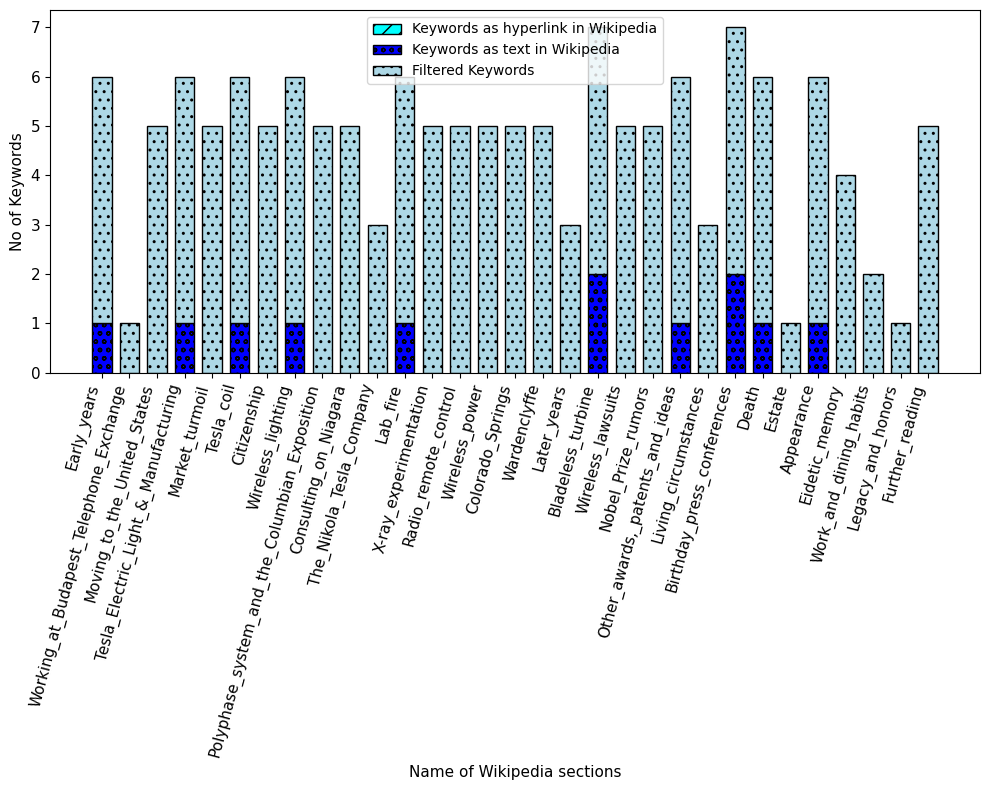

In [84]:
#Plot has been done for the tag has greater than 1 value
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 8))

x = list(mp3.keys())
y1 = list(mp3.values())
y2 = list(mp2.values())
y3 = list(mp1.values())

plt.bar(x, y1, width=0.7, color ='#00FFFF', hatch= "//", edgecolor = "black")
plt.bar(x, y2, bottom=y1, width=0.7, color ='blue', hatch= "oo", edgecolor = "black")
plt.bar(x, y3, bottom=y2, width=0.7, color ='lightblue', hatch= "..", edgecolor = "black")

plt.xlabel("Name of Wikipedia sections", fontsize=11, y= -0.1)
#plt.ylabel("Ratio of the duplicate question\n to the all question associated\n with the particular tag", fontsize=14)
plt.ylabel("No of Keywords", fontsize=11)
#plt.title("Students enrolled in different courses")
plt.xticks(rotation=75, fontsize=11, ha="right")
plt.yticks(fontsize=11)
plt.legend(["Keywords as hyperlink in Wikipedia", "Keywords as text in Wikipedia", "Filtered Keywords"])

#plt.show()
plt.tight_layout()
plt.savefig(f"kw_dist_wiki_sec_{book}.png")

# Wikipedia Page Creation
I am targeting the keywords which are present in wikipedia as a text but no hyperlinks are present and timed keywords that are present in different wikipedia section but in different year

In [85]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Discovered_In_Awarehouse', 'Time_Period_Tesla', 'Time_Ambassador_Stanko_Stoilkovic', 'Edison_Lightbulb_Patents', 'Theevent_Tesla', 'Tesla_Name', 'Tesla_Andbell', 'Tesla_Wrote_Robert', 'Turbines', 'Philosophy', 'Tesla_Told_Westinghouse', 'Theintensity_Of_Feeling', 'Wireless_Transmission', 'Tesla_Aboutclark', 'Edison_Machine_Worksin', 'Teslathe_Use', 'Edison_Company', 'Original_Inventor', 'Subsidiaries_Of_Gebut', 'Bill_Tesla', 'Opposing_Attorney', 'Inducedin_Tesla', 'Tesla_Papers', 'Roaring_Twenties', 'Fatherof_The_Idea.In', 'Batchelor_Incorrectlyas_Edison', 'External_Stimuli', 'Letterfrom_Nikola_Tesla', 'Alternating_Current', 'Deep_Neuroticconstellation', 'Electromagnetic_Waves', 'Abstract_Mathematicancarefully', 'Owned_The_Patents.Although', 'Nikola_Tesla1Tesla', 'Heinrich_Hertz', 'Nikola_Tesla', 'Invention', 'John_Hays_Hammond', 'Tesla_Thecontract', 'Electricity', 'Inventor', 'Mentionof_Tesla', 'Psychoneurological_Disturbances', 'Relationshipbetween_Electromagnetic', 'Tesla_Article'

In [86]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)
     

1438
{'HarperCollins', 'Belgrade', 'Gender_equality', 'MOSFET', 'Usenet', 'Category:All_articles_containing_potentially_dated_statements', 'IEEE_Council_on_Superconductivity', 'IEEE_Control_Systems_Society', '%C4%90erdap_National_Park', 'Multiplexing', 'GlobalSpec', 'Tesla_Science_Center_at_Wardenclyffe', '40th_Street_(Manhattan)', 'Help:IPA/English', 'Jagadish_Chandra_Bose', 'Charles_Grafton_Page', 'Internet', 'Category:Articles_with_ISNI_identifiers', 'Multiple_exposure', 'Erna_Schneider_Hoover', 'Category:Articles_with_PLWABN_identifiers', 'Lika', 'Roentgen_(unit)', 'Category:Grand_Crosses_of_the_Order_of_St._Sava', 'Portal:Energy', 'Category:Articles_with_Trove_identifiers', 'History_of_the_Internet', 'Special:BookSources/1-893817-01-6', 'Biplane', 'Charles_University', 'NPL_network', 'Wilhelm_R%C3%B6ntgen', 'SI_unit', 'Semiconductor', 'Bel_(unit)', 'Stevan_Mokranjac', 'Category:Serbian_engineers', 'Niagara_Falls,_Ontario', 'Tesla_(band)', 'IEEE_Nanotechnology_Council', 'Jovan_Cvij

In [87]:
hyperlinks_present = final_keywords & set(urls)
print(hyperlinks_present)
len(hyperlinks_present)

{'Thomas_Edison', 'George_Westinghouse', 'Telegraphy', 'Heinrich_Hertz'}


4

In [88]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Tesla_1911', 'Wirelesscommunication_Poppycock_1909', 'Edisongeneral_Electric_1891', 'Silent_As_Onlyyou_1900', '7Bogus_Inventors_1890', 'Tesla_1894', 'Father_Tesla_1856', 'Turbine_1909', 'Tesla_1892', 'Inventor_1898', 'Gas_Turbine_1909', 'Edisonwas_1893', 'Nikola_Tesla_1893', 'Teslathe_Use_1902', 'Tesla_Continued_1934', 'Psychoneurological_Disturbances_1856', 'Licensing_Agreements_1917', 'Nikola_Tesla_1884', 'Tesla_1918', 'Nikola_Tesla22Astor_1907', 'Westinghouse_Campagainst_Tesla_1888', 'Mentionof_Tesla_1934', 'Edison_Electric_1891', 'Tesla_Oscillator_1893', 'John_Hays_Hammond_1911', 'Discoveries_1890', 'Bookthat_Tesla_1856', 'Electrical_Energy_1907', 'Nikola_Tesla_1895', 'Invention_1898', 'Nikola_Tesla_1856', 'Electrical_Exposition_1891', 'Tesla_Andbell_1911', 'Telegraphy_1915', 'Original_Inventor_1915', 'Patents.Although_The_Thomson-Houston_1890', 'Edison_Lightbulb_Patents_1890', 'Philosophy_1905', 'Themselves.Prior_To_Coming_1886', 'Article_Tesla_1899', 'Electricity_1888', 'Electr

In [89]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Influences_Monasticenvironment_1843': ['1/chapter_1'], 'Psychoneurological_Disturbances_1856': ['1/chapter_2'], 'Theintensity_Of_Feeling_1856': ['1/chapter_2'], 'Tesla_Name_1856': ['1/chapter_2'], 'Tesla_1892': ['1/chapter_10'], 'Tesla_1894': ['1/chapter_13', '1/chapter_15'], 'Tesla_1907': ['1/chapter_36'], 'Tesla_1911': ['1/chapter_38'], 'Tesla_1918': ['1/chapter_42'], 'Tesla_1934': ['1/chapter_45'], 'Bookthat_Tesla_1856': ['1/chapter_2'], 'Teslawrote_1856': ['1/chapter_2'], 'Nikola_Tesla_1856': ['1/chapter_2'], 'Nikola_Tesla_1884': ['1/chapter_4'], 'Nikola_Tesla_1886': ['1/chapter_5'], 'Nikola_Tesla_1893': ['1/chapter_11', '1/chapter_12'], 'Nikola_Tesla_1895': ['1/chapter_16'], 'Nikola_Tesla_1902': ['1/chapter_32'], 'Nikola_Tesla_1907': ['1/chapter_36'], 'Nikola_Tesla_1911': ['1/chapter_38'], 'Nikola_Tesla_1934': ['1/chapter_45'], 'Hug_And_Pet_1856': ['1/chapter_2'], 'Father_Tesla_1856': ['1/chapter_2'], 'Electricity_1888': ['1/chapter_6'], 'Edisonand_Batchelor_1884': ['1/chapter_4

In [90]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['tesla', 'wirelesscommunication poppycock', 'edisongeneral electric', 'silent as onlyyou', '7bogus inventors', 'tesla', 'father tesla', 'turbine', 'tesla', 'inventor', 'gas turbine', 'edisonwas', 'nikola tesla', 'teslathe use', 'tesla continued', 'psychoneurological disturbances', 'licensing agreements', 'nikola tesla', 'tesla', 'nikola tesla22astor', 'westinghouse campagainst tesla', 'mentionof tesla', 'edison electric', 'tesla oscillator', 'john hays hammond', 'discoveries', 'bookthat tesla', 'electrical energy', 'nikola tesla', 'invention', 'nikola tesla', 'electrical exposition', 'tesla andbell', 'telegraphy', 'original inventor', 'patents.although the thomson-houston', 'edison lightbulb patents', 'philosophy', 'themselves.prior to coming', 'article tesla', 'electricity', 'electrical engineeringdepartment', 'bill tesla', 'wireless plantalleges', 'external stimuli', 'turbines', 'edison machine worksin', 'invention thenewspapers', 'writings ofnikola tesla', 'fatherof the idea.in', '

In [91]:
import re
para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

23
133
0.17293233082706766


In [92]:
from google.colab import files